In [1]:
import statsmodels.api as sm
from scipy.stats import norm
from scipy.stats import t
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import figure
import warnings
warnings.filterwarnings('ignore')


## PlantFood Research : 

- your are a researcher interested in the effectiveness of three different cotton plant food : 
1. Awesome Advantage  (AA)
2. Big Buds (BB)
3. Copious Cotton (CC)

- Therefor you design an experiment in which you test each plantfood AA,BB,CC with one feeding per day for 75 days after planting. 
- Eight plants will be tested for each combination. 
- The variable of interest is the plant height in cm . 

- The same type of cotton seed will be used for the entire experiment.



In [2]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [3]:
data = pd.read_csv("plantgrowth.csv")

In [4]:
onefeeding = data.loc[data["Feedings"]=="ONE FEEDING"]

In [5]:
onefeeding

,Feedings,FoodType,PlantGrowth
0,ONE FEEDING,AA,65
1,ONE FEEDING,AA,70
2,ONE FEEDING,AA,60
3,ONE FEEDING,AA,60
4,ONE FEEDING,AA,60
5,ONE FEEDING,AA,55
6,ONE FEEDING,AA,60
7,ONE FEEDING,AA,50
8,ONE FEEDING,BB,70
9,ONE FEEDING,BB,65


In [6]:
onefeeding.pivot_table(values="PlantGrowth",columns="FoodType")

FoodType,AA,BB,CC
PlantGrowth,60.0,62.5,57.5


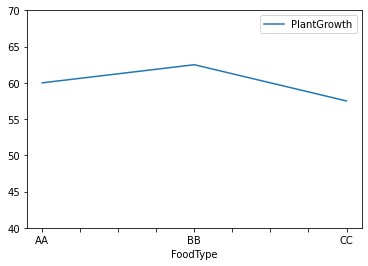

In [7]:
onefeeding.pivot_table(values="PlantGrowth",index="FoodType").plot()
plt.yticks(np.arange(40,75,5))
plt.show()

In [8]:
stats.f_oneway(onefeeding[onefeeding["FoodType"]=="AA"]["PlantGrowth"],
              onefeeding[onefeeding["FoodType"]=="BB"]["PlantGrowth"],
              onefeeding[onefeeding["FoodType"]=="CC"]["PlantGrowth"])

<IPython.core.display.Javascript object>

F_onewayResult(statistic=1.1666666666666667, pvalue=0.33078541251317667)

In [9]:

model = ols('PlantGrowth ~ C(FoodType)' , data=onefeeding).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(FoodType),100.0,2.0,1.166667,0.330785
Residual,900.0,21.0,NaN,NaN


   **if there a difference in heights amonth three foods ?** 


   **based on one way anova test , we reject null hypothesis .** 
   **there's no difference among the plant food means based on one feedings per day .** 


- ### Is there any difference in plant growth when comparing 1 feeding to 2 feedings per day ? 

- ### DO some plant foods work better once per day and others better at twice per day . ? 

In [10]:
data.sample(5)

,Feedings,FoodType,PlantGrowth
21,ONE FEEDING,CC,60
39,TWO FEEDINGS,BB,60
33,TWO FEEDINGS,BB,60
28,TWO FEEDINGS,AA,70
41,TWO FEEDINGS,CC,40


In [11]:
data.pivot_table(values="PlantGrowth",columns="FoodType",index ="Feedings",margins=True)

FoodType,AA,BB,CC,All
Feedings,,,,
ONE FEEDING,60.0000,62.5000,57.5000,60.0000
TWO FEEDINGS,66.8750,66.8750,40.6250,58.1250
All,63.4375,64.6875,49.0625,59.0625


    We make table of means , the values are not individual data points .
    they are all means with their own distribution .

    in two way anova, 
    the way the distributions fit together  is the very heart of the technique.

<AxesSubplot:xlabel='FoodType'>

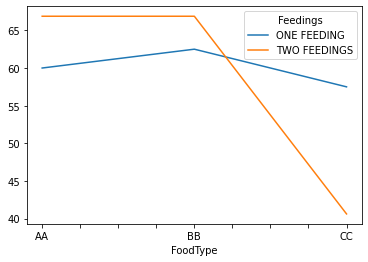

In [12]:
data.pivot_table(values="PlantGrowth",index="FoodType",columns ="Feedings").plot()

### Questions : 
- For AA, howmany feedings produce more growht ? 
- For BB, Howmany feedings produce more growth and for CC ?

- DO two feedings produce more growth across all plant foods consistantly? 


No, it appears that two feedings are better for AA and BB , Not for CC/

This type of situatation is called an **Interaction.**

An interaction occurs when the effect of one factor changes , for different level of other factor.


In this case the most effective feeding frequency changes across plant food types.

On a marginal chart as a general rule , we look to see if the lines cross or would cross ! 

In [13]:

model = ols('PlantGrowth ~ C(Feedings) + C(FoodType) + C(Feedings):C(FoodType)', data=data).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Feedings),42.1875,1.0,0.577982,0.451351
C(FoodType),2412.5000,2.0,16.525994,0.000005
C(Feedings):C(FoodType),1362.5000,2.0,9.333333,0.000443
Residual,3065.6250,42.0,NaN,NaN


In [14]:
# From above anova two way test , we have the significant interaction . 
# That leads us to see the factors individually. 

on the marginal means graph : 

the factor of interest or the factor with the most levels is on the horizontal axis. 

the dependent variable the vertical axis . (what is being measured. )

the second factor makes up the series lines by graphing the dependent variable value for each level/category of the first factor.

look for crossing or non parallel line on the graph. 

**if the interaction is significant  ,then the main factors significance cannot be analysed , the factors are too intertwined.**

In [15]:
data.pivot_table(values="PlantGrowth",columns="FoodType",index ="Feedings",margins=True)

FoodType,AA,BB,CC,All
Feedings,,,,
ONE FEEDING,60.0000,62.5000,57.5000,60.0000
TWO FEEDINGS,66.8750,66.8750,40.6250,58.1250
All,63.4375,64.6875,49.0625,59.0625


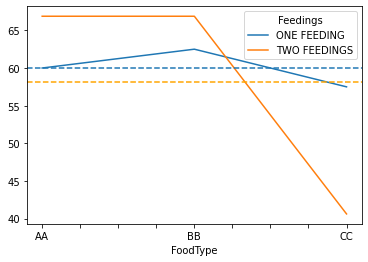

In [16]:
data.pivot_table(values="PlantGrowth",index="FoodType",columns ="Feedings").plot()

plt.axhline(60,linestyle="--")
plt.axhline(58.1250,linestyle="--",color="orange")
plt.show()


In [17]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])

    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(Feedings),42.1875,1.0,42.187500,0.577982,0.451351,0.006129,-0.004428
C(FoodType),2412.5000,2.0,1206.250000,16.525994,0.000005,0.350511,0.325846
C(Feedings):C(FoodType),1362.5000,2.0,681.250000,9.333333,0.000443,0.197957,0.174892
Residual,3065.6250,42.0,72.991071,NaN,NaN,NaN,NaN


In [18]:
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(data['PlantGrowth'], data['FoodType'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
AA,BB,1.25,0.9,-7.2903,9.7903,False
AA,CC,-14.375,0.001,-22.9153,-5.8347,True
BB,CC,-15.625,0.001,-24.1653,-7.0847,True


## Roller Coaster Wait Times : 

- Tou are an analyst for kings island amusement park . YOu have been asked to determine `if there's a difference in wait time between three big roller coasters` in the park . **The Beast , Banshee and Diamondback.**


- To conduct your analysis , you track the wait time for 25 random riders on each ride. While one way anova procedure will test the hypothesis that all three mean weait times are equal . The test will not tell you **Where those differences occure** amongs the coasters. 

In [19]:
data = pd.read_csv("RollerCoster_waitTime.csv")

In [20]:
RollerCosters = data.melt(value_name="wait_time",var_name="Rides")

In [21]:
RollerCosters

,Rides,wait_time
0,BEAST,23.5
1,BEAST,19.7
2,BEAST,14.8
3,BEAST,24.2
4,BEAST,40.2
...,...,...
70,DIAMONDBACK,56.4
71,DIAMONDBACK,56.0
72,DIAMONDBACK,75.6
73,DIAMONDBACK,70.1


In [22]:

model = ols('wait_time ~ C(Rides)' , data=RollerCosters).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Rides),8788.2912,2.0,21.353955,5.231290e-08
Residual,14815.9200,72.0,NaN,NaN


- **If the f-test is significant, we do not know where the differences are located** 

- There are several multiple comparision procedures : Fisher's LSD . Tukey HSD , Scheffe's Method, Bonferroni . 

In [23]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])

    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(Rides),8788.2912,2.0,4394.145600,21.353955,5.231290e-08,0.372319,0.351816
Residual,14815.9200,72.0,205.776667,NaN,NaN,NaN,NaN


#### Difference Matrix : 


In [24]:
diffs = data.mean().sort_values(ascending=False)

In [25]:
diffs

DIAMONDBACK    58.904
BANSHEE        42.440
BEAST          32.672
dtype: float64

In [26]:
np.array(diffs)

array([58.904, 42.44 , 32.672])

In [27]:
diffmat = []
for i in np.array(diffs):
    diffmat.append(i-np.array(diffs))
diffmat

[array([ 0.   , 16.464, 26.232]),
 array([-16.464,   0.   ,   9.768]),
 array([-26.232,  -9.768,   0.   ])]

In [28]:
diffmat = pd.DataFrame(diffmat)

In [29]:
diffmat

,0,1,2
0,0.000,16.464,26.232
1,-16.464,0.000,9.768
2,-26.232,-9.768,0.000


In [30]:
diffmat.columns = ['DIAMONDBACK', 'BANSHEE', 'BEAST']

In [31]:
diffmat.index = ['DIAMONDBACK', 'BANSHEE', 'BEAST']

In [32]:
diffmat

,DIAMONDBACK,BANSHEE,BEAST
DIAMONDBACK,0.000,16.464,26.232
BANSHEE,-16.464,0.000,9.768
BEAST,-26.232,-9.768,0.000


<AxesSubplot:xlabel='Rides', ylabel='wait_time'>

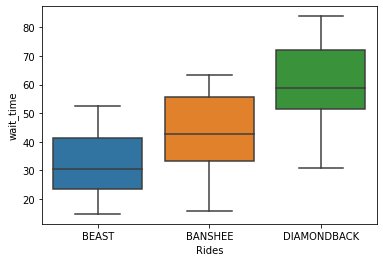

In [33]:
sns.boxplot(x = RollerCosters["Rides"],
           y=  RollerCosters["wait_time"])

In [34]:
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(RollerCosters['wait_time'], RollerCosters['Rides'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
BANSHEE,BEAST,-9.768,0.0483,-19.4778,-0.0582,True
BANSHEE,DIAMONDBACK,16.464,0.001,6.7542,26.1738,True
BEAST,DIAMONDBACK,26.232,0.001,16.5222,35.9418,True


In [35]:
import scikit_posthocs as sp
sp.posthoc_ttest(RollerCosters, val_col='wait_time', group_col='Rides', p_adjust=None, pool_sd=True )

,BEAST,BANSHEE,DIAMONDBACK
BEAST,1.000000,1.862747e-02,1.242146e-04
BANSHEE,0.018627,1.000000e+00,1.053171e-08
DIAMONDBACK,0.000124,1.053171e-08,1.000000e+00


https://www.statsmodels.org/devel/generated/statsmodels.sandbox.stats.multicomp.MultiComparison.html

In [36]:
df = pd.read_csv("https://raw.githubusercontent.com/researchpy/Data-sets/master/difficile.csv")

In [37]:
df.drop('person', axis= 1, inplace= True)

# Recoding value from numeric to string
df['dose'].replace({1: 'placebo', 2: 'low', 3: 'high'}, inplace= True)

df

,dose,libido
0,placebo,3
1,placebo,2
2,placebo,1
3,placebo,1
4,placebo,4
5,low,5
6,low,2
7,low,4
8,low,2
9,low,3


In [38]:

stats.f_oneway(df['libido'][df['dose'] == 'high'],
               df['libido'][df['dose'] == 'low'],
               df['libido'][df['dose'] == 'placebo'])

<IPython.core.display.Javascript object>

F_onewayResult(statistic=5.11864406779661, pvalue=0.024694289538222603)

In [39]:
model = ols('libido ~ C(dose)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(dose),20.133333,2.0,5.118644,0.024694
Residual,23.600000,12.0,NaN,NaN


In [40]:

def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])

    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(dose),20.133333,2.0,10.066667,5.118644,0.024694,0.460366,0.354486
Residual,23.600000,12.0,1.966667,NaN,NaN,NaN,NaN


#### HOMOGENEITY OF VARIANCE

In [41]:
stats.levene(df['libido'][df['dose'] == 'high'],
             df['libido'][df['dose'] == 'low'],
             df['libido'][df['dose'] == 'placebo'])

<IPython.core.display.Javascript object>

LeveneResult(statistic=0.11764705882352934, pvalue=0.8900225182757423)

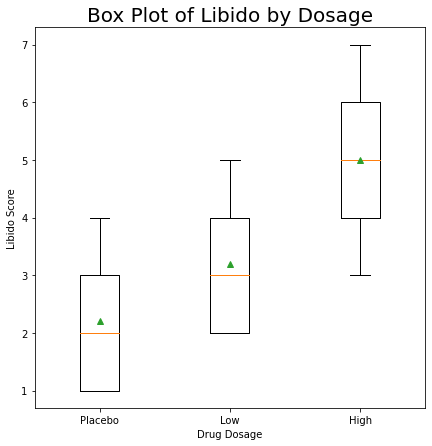

In [42]:
fig = plt.figure(figsize= (7, 7))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Libido by Dosage", fontsize= 20)
ax.set

data = [df['libido'][df['dose'] == 'placebo'],
        df['libido'][df['dose'] == 'low'],
        df['libido'][df['dose'] == 'high']]

ax.boxplot(data,
           labels= ['Placebo', 'Low', 'High'],
           showmeans= True)

plt.xlabel("Drug Dosage")
plt.ylabel("Libido Score")

plt.show()

#### TUKEY HONESTLY SIGNIFICANT DIFFERENCE (HSD)

In [43]:
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(df['libido'], df['dose'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
high,low,-1.8,0.1472,-4.1651,0.5651,False
high,placebo,-2.8,0.0209,-5.1651,-0.4349,True
low,placebo,-1.0,0.5171,-3.3651,1.3651,False


- At the top the table testing information is provided


- FWER is the familywise error rate, i.e. what  is being set to and controlled at
- group1 and group2 columns are the groups being compared
- meandiff is the difference between the group means
- p-adj is the corrected p-value which takes into account the multiple comparisons being conducted
- lower is the lower band of the confidence interval. In the current example the confidence interval at the 95% level since = 0.05.

- upper is the upper band of the confidence interval. In the current example the confidence interval at the 95% level since = 0.05.
- reject is the decision rule based on the corrected p-value

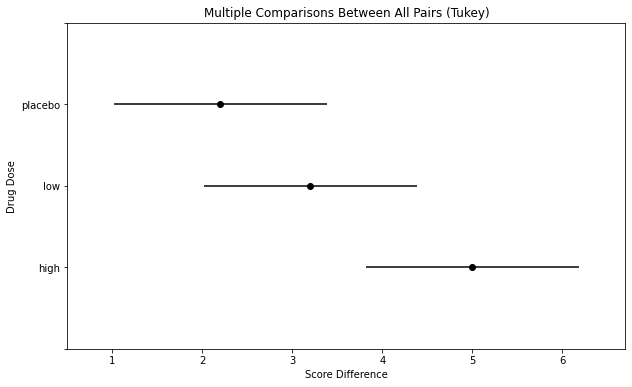

In [44]:
post_hoc_res.plot_simultaneous(ylabel= "Drug Dose", xlabel= "Score Difference")
plt.show()

#### BONFERRONI CORRECTION

In [45]:

comp = mc.MultiComparison(df['libido'], df['dose'])
tbl, a1, a2 = comp.allpairtest(stats.ttest_ind, method= "bonf")

tbl

<IPython.core.display.Javascript object>

group1,group2,stat,pval,pval_corr,reject
high,low,1.964,0.0851,0.2554,False
high,placebo,3.0551,0.0157,0.0471,True
low,placebo,1.2127,0.2598,0.7795,False


https://www.pythonfordatascience.org/anova-python/

In [46]:
drug1 = pd.Series(np.random.normal(4.0,0.2,52))
drug2 = pd.Series(np.random.normal(4.0,0.2,45))
drug3 = pd.Series(np.random.normal(3.0,0.2,38))
drug4 = pd.Series(np.random.normal(4.0,0.2,53))
drug5 = pd.Series(np.random.normal(4.0,0.2,40))
data = pd.DataFrame([drug1,drug2,drug3,drug4,drug5]).T
data.columns = ["drug1","drug2","drug3","drug4","drug5"]

In [47]:
data

,drug1,drug2,drug3,drug4,drug5
0,3.992387,3.831912,2.829696,3.821642,3.806897
1,4.466517,4.006399,3.138025,4.131418,3.743768
2,3.989314,3.781178,3.190763,4.216015,3.842467
3,3.959203,3.770073,3.528980,3.929647,3.808784
4,4.254620,4.069856,2.810602,3.755233,4.175210
5,4.116391,4.311463,3.177036,4.044830,4.041540
6,4.019596,3.555213,3.137701,3.800173,3.995685
7,4.018418,3.760256,2.653506,4.004704,3.878371
8,3.666364,4.183412,2.959149,3.924794,4.302382
9,4.040865,4.077553,3.180918,3.928265,4.188321


In [48]:
data = data.melt(value_name="RecoveryTime",var_name="Drug")

In [49]:
data = data.dropna()

In [50]:
data

,Drug,RecoveryTime
0,drug1,3.992387
1,drug1,4.466517
2,drug1,3.989314
3,drug1,3.959203
4,drug1,4.254620
...,...,...
247,drug5,4.088112
248,drug5,3.999116
249,drug5,3.904186
250,drug5,4.120966


In [51]:
model = ols('RecoveryTime ~ C(Drug)', data=data).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Drug),29.103638,4.0,186.51607,6.257596e-70
Residual,8.699131,223.0,NaN,NaN


In [52]:

comp = mc.MultiComparison(data['RecoveryTime'], data["Drug"])
tbl, a1, a2 = comp.allpairtest(stats.ttest_ind, method= "bonf")

tbl

<IPython.core.display.Javascript object>

group1,group2,stat,pval,pval_corr,reject
drug1,drug2,1.3576,0.1778,1.0,False
drug1,drug3,24.1844,0.0,0.0,True
drug1,drug4,-0.0543,0.9568,1.0,False
drug1,drug5,1.0659,0.2893,1.0,False
drug2,drug3,20.1109,0.0,0.0,True
drug2,drug4,-1.2436,0.2167,1.0,False
drug2,drug5,-0.3384,0.7359,1.0,False
drug3,drug4,-21.1598,0.0,0.0,True
drug3,drug5,-21.7425,0.0,0.0,True
drug4,drug5,0.957,0.3411,1.0,False


In [53]:
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(data['RecoveryTime'], data["Drug"])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
drug1,drug2,-0.0521,0.6705,-0.1627,0.0585,False
drug1,drug3,-0.9767,0.001,-1.0926,-0.8608,True
drug1,drug4,0.0021,0.9,-0.1039,0.1081,False
drug1,drug5,-0.0382,0.8835,-0.1524,0.0761,False
drug2,drug3,-0.9246,0.001,-1.0443,-0.8049,True
drug2,drug4,0.0542,0.6376,-0.0559,0.1643,False
drug2,drug5,0.0139,0.9,-0.1041,0.132,False
drug3,drug4,0.9788,0.001,0.8634,1.0943,True
drug3,drug5,0.9386,0.001,0.8155,1.0616,True
drug4,drug5,-0.0403,0.8526,-0.154,0.0735,False


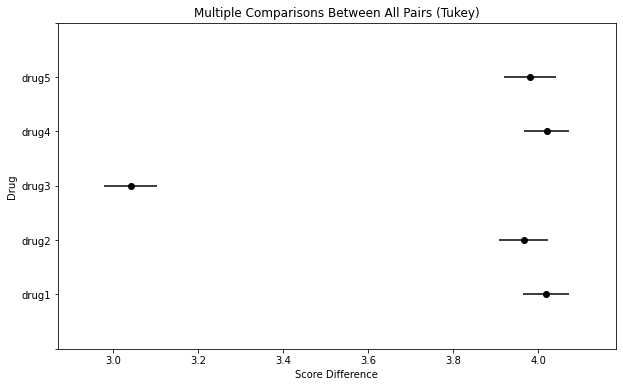

In [55]:
post_hoc_res.plot_simultaneous(ylabel= "Drug", xlabel= "Score Difference")
plt.show()

# CDF

In [84]:
df = pd.DataFrame(stats.norm.rvs(75,10,50),columns=["Weights"])

<IPython.core.display.Javascript object>

In [85]:
df.sort_values(by="Weights",inplace=True)

In [86]:
df

,Weights
23,55.690659
35,61.904456
39,62.293961
27,62.489425
4,62.581391
30,62.791240
11,62.990685
22,64.167038
19,64.646911
40,65.491897


In [87]:
df["Count"] = np.arange(1,51)

In [88]:
df.head()

,Weights,Count
23,55.690659,1
35,61.904456,2
39,62.293961,3
27,62.489425,4
4,62.581391,5


In [89]:
df["percentiles"] = df["Count"]/50

In [90]:
df.head()

,Weights,Count,percentiles
23,55.690659,1,0.02
35,61.904456,2,0.04
39,62.293961,3,0.06
27,62.489425,4,0.08
4,62.581391,5,0.10


In [91]:
df["Z_emperical"] = (df["Weights"]-df["Weights"].mean())/df["Weights"].std()

In [92]:
df.head()

,Weights,Count,percentiles,Z_emperical
23,55.690659,1,0.02,-2.056916
35,61.904456,2,0.04,-1.381413
39,62.293961,3,0.06,-1.339070
27,62.489425,4,0.08,-1.317821
4,62.581391,5,0.10,-1.307824


In [93]:
df["Z_theoretical"] = stats.norm.ppf(df["percentiles"])

<IPython.core.display.Javascript object>

In [94]:
df.head()

,Weights,Count,percentiles,Z_emperical,Z_theoretical
23,55.690659,1,0.02,-2.056916,-2.053749
35,61.904456,2,0.04,-1.381413,-1.750686
39,62.293961,3,0.06,-1.339070,-1.554774
27,62.489425,4,0.08,-1.317821,-1.405072
4,62.581391,5,0.10,-1.307824,-1.281552


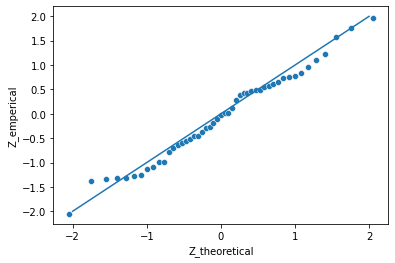

In [98]:
sns.scatterplot(y=df["Z_emperical"],
               x = df["Z_theoretical"])
plt.plot([-2,-1,0,1,2],[-2,-1,0,1,2])

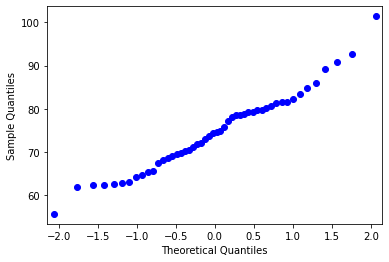

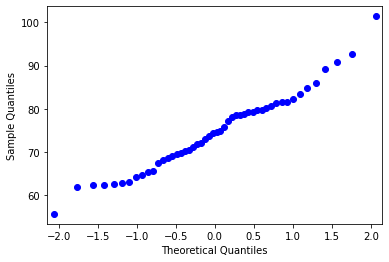

In [97]:
sm.qqplot(df["Weights"])